# Metody Obliczeniowe w Nauce i Technice
# Laboratorium 9: Zastosowania DFT
## Przemysław Roman

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from PIL import Image
from PIL import ImageOps
from numpy.fft import *

def time_exec(func, *args):
    start_time = time.time()
    result = func(*args)
    return result, time.time() - start_time

mpl.rcParams['axes.titlesize'] = 18

## Zadanie 1 Analiza obrazów

- Wczytaj obraz przedstawiający tekst, dokonaj odwrócenia kolorów (czarne tło), a
następnie jego transformacji do domeny częstotliwościowej za pomocą DFT. Przed-
staw wartości fazy i modułu współczynników Fouriera (osobno).
- Wybierz przykładowego reprezentanta grupy - wytnij z dużego zdjęcia wzorzec
obiektu np. literę e lub charakterystyczny fragment ryby z ławicy (imcrop).
- Wykorzystując transformację Fouriera oblicz korelację między wybranym wzorcem,
a całym obrazem
- Przedstaw otrzymany obraz wyjściowy oraz punkty, w których wykryto wystąpie-
nie wzorca (nałóż je na obraz oryginalny).
- Znajdź liczbę wystąpień wzorca. Testy przeprowadź na dwóch zbiorach danych.

In [3]:
def open_image(im_path):
    im = Image.open(im_path)
    w, h = im.size
    return im, w, h

def process_image(im):
    im_gray = ImageOps.grayscale(im)
    im_inv = ImageOps.invert(im_gray)
    im_swap = np.swapaxes(np.array(im_inv), 0, 1)
    return im_swap

def show_amplitude_phase(im_dft, figsize):
    im_unswap = np.swapaxes(np.array(im_dft), 0, 1)
    fig, axs = plt.subplots(1, 2, figsize=np.array(figsize)*0.75)
    axs[0].imshow(np.log(abs(im_unswap)), cmap='gray')
    axs[0].set_title('Amplituda')
    axs[1].imshow(np.angle(im_unswap), cmap='gray')
    axs[1].set_title('Faza')
    plt.show()

def match_pattern_within_image(im_path, pattern_path, figsize, min_match_perc=0.95,
                               show_amplitude_phase_f=True, additional_process_im=None):
    im, W, H = open_image(im_path)
    im_processed = process_image(im)
    if additional_process_im != None:
        im_processed = additional_process_im(im_processed)
    im_dft = fft2(im_processed)

    pattern, w, h = open_image(pattern_path)
    pattern_processed = process_image(pattern)

    C = np.real(ifft2(im_dft * fft2(np.rot90(pattern_processed, k=2), s=[W, H])))
    C_min_match = min_match_perc * (np.max(C) - np.min(C)) + np.min(C)

    im_full = im.load()
    matches = np.argwhere(C >= C_min_match)
    for x, y in matches:
        for dx in range(w):
            for dy in range(h):
                r, g, b = im_full[x-dx, y-dy]
                im_full[x-dx,y-dy] = (r+100, g-50, b-50)

    if show_amplitude_phase_f:
        show_amplitude_phase(im_dft, figsize)

    plt.figure(figsize=figsize)
    fig, axs = plt.subplots(1, 1, figsize=figsize)
    axs.imshow(im)
    axs.set_title(f'Wystąpień wzorca: {len(matches)}')
    plt.show()

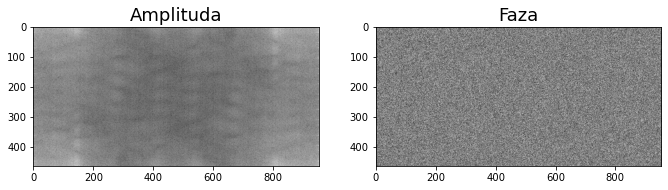

<Figure size 1080x720 with 0 Axes>

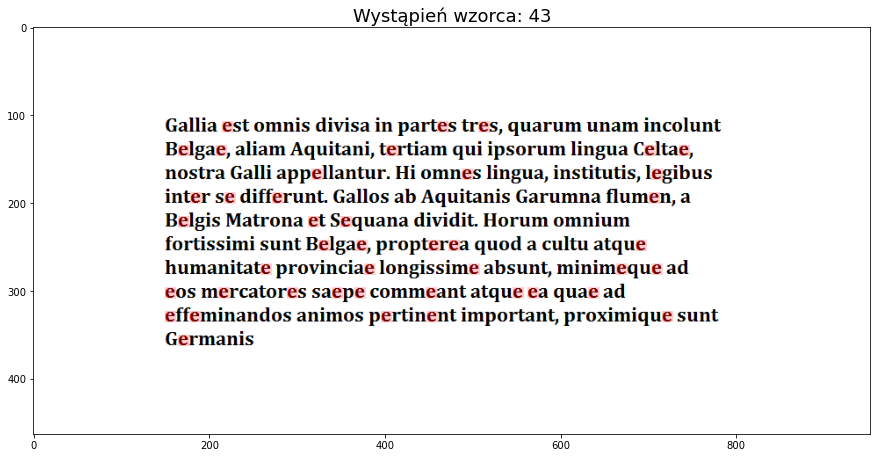

In [4]:
match_pattern_within_image(im_path='img/galia.png', pattern_path='img/galia_e.png', min_match_perc=0.95, figsize=(15, 10))

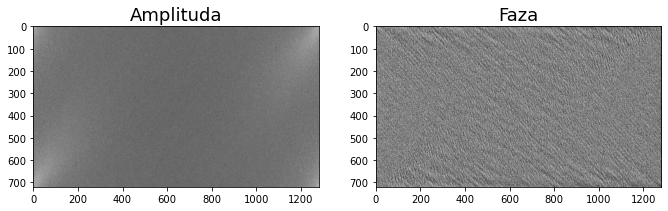

<Figure size 1080x720 with 0 Axes>

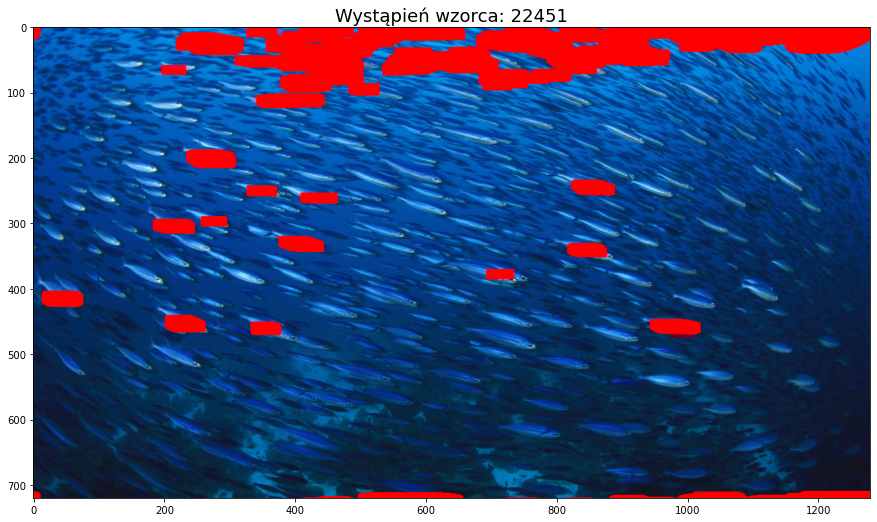

In [5]:
match_pattern_within_image(im_path='img/fish.jpg', pattern_path='img/fish1.png', min_match_perc=0.5, figsize=(15, 10),
                           additional_process_im=lambda im: np.abs(np.array(im) - 150))